In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [58]:
#Create empty lists for lat and long coordinates and their city names
lat_lngs = []
cities = []

# Create 1500 sets of random lat and lng combinations and zip them into coords
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
coords = list(lat_lngs)

In [59]:
#Use CityPy to get nearest city to each coordinate
for x in coords:
    city = citipy.nearest_city(x[0],x[1]).city_name
    #Append city to cities list if not already in the list
    if city not in cities:
        cities.append(city)

#Create new dataframe with an index, city, and blank columns for needed data        
cities_df = pd.DataFrame({"City" : cities, "Country":"", "Lat":"" , "Lng":"", "Date":"", "Max_Temp":"", "Humidity":"", "Cloudiness":"", "Wind_Speed":""})    

#Ensure there are sufficient number of cities to allow for missing data and still have 500 remaining
print(len(cities_df))

609


In [60]:
#For every row in the 
for index, row in cities_df.iterrows():
    city = row["City"]
    units = "imperial"

    url = "http://api.openweathermap.org/data/2.5/weather?"
    # Build query URL and request your results in Farenheit
    query_url = f"{url}appid={api_key}&q={city}&units={units}"

    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    #print(json.dumps(weather_json, indent=4, sort_keys=True))
    
    #Fill index row with resulting Lat, Lng, Date, Country, Max Temp, Humidity, Wind Speed, and Clouds
    #Print city and city index as data is received
    try:
        cities_df.loc[index,"Lat"] =  weather_json["coord"]["lat"]
        cities_df.loc[index,"Lng"] =  weather_json["coord"]["lon"]
        cities_df.loc[index,"Date"] = weather_json["dt"]
        cities_df.loc[index,"Country"] =  weather_json["sys"]["country"]
        cities_df.loc[index,"Max_Temp"] =  weather_json["main"]["temp_max"]
        cities_df.loc[index,"Humidity"] =  weather_json["main"]["humidity"]
        cities_df.loc[index,"Wind_Speed"] =  weather_json["wind"]["speed"]
        cities_df.loc[index,"Cloudiness"] =  weather_json["clouds"]["all"]
        print("Index #:" + str(index) + " City: " + city)
    except (KeyError, IndexError):
        print("Missing stuff... skipping.")
print(len(cities_df))
cities_df.head()

Index #:0 City: cortez
Index #:1 City: avarua
Index #:2 City: ivanava
Index #:3 City: ahipara
Index #:4 City: lebu
Index #:5 City: faanui
Index #:6 City: hami
Index #:7 City: emba
Index #:8 City: bredasdorp
Index #:9 City: mataura
Index #:10 City: waipawa
Index #:11 City: acari
Index #:12 City: guerrero negro
Index #:13 City: sola
Missing stuff... skipping.
Index #:15 City: bambous virieux
Index #:16 City: port elizabeth
Index #:17 City: san antonio
Index #:18 City: bluff
Index #:19 City: dire
Index #:20 City: severo-kurilsk
Index #:21 City: hervey bay
Index #:22 City: gisborne
Index #:23 City: at-bashi
Index #:24 City: aklavik
Index #:25 City: jamestown
Index #:26 City: buala
Index #:27 City: butaritari
Index #:28 City: harbour breton
Index #:29 City: udachnyy
Index #:30 City: lyudinovo
Index #:31 City: acajutla
Missing stuff... skipping.
Index #:33 City: rio cuarto
Index #:34 City: ushuaia
Index #:35 City: coquimbo
Index #:36 City: kaitangata
Index #:37 City: mehamn
Index #:38 City: 

,City,Country,Lat,Lng,Date,Max_Temp,Humidity,Cloudiness,Wind_Speed
0,cortez,US,37.35,-108.58,1564120795,70,68,1,10.13
1,avarua,CK,-21.21,-159.78,1564120795,71.6,83,100,3.36
2,ivanava,BY,52.14,25.53,1564120795,60.97,88,95,7.23
3,ahipara,NZ,-35.17,173.16,1564120796,55,100,79,10.6
4,lebu,ET,8.96,38.73,1564120796,57.2,93,75,6.93


In [61]:
#Save resulting data to cities.csv
cities_df.to_csv("cities.csv")

#Search for empty strings (no info found for city), replace with nan, and drop the nan row
cities_df["Country"].replace("", np.nan, inplace=True)
cities_df.dropna(subset=["Country"], inplace=True)

#Ensure there are still 500 cities remaining to plot
print(len(cities_df))
cities_df

544


,City,Country,Lat,Lng,Date,Max_Temp,Humidity,Cloudiness,Wind_Speed
0,cortez,US,37.35,-108.58,1564120795,70,68,1,10.13
1,avarua,CK,-21.21,-159.78,1564120795,71.6,83,100,3.36
2,ivanava,BY,52.14,25.53,1564120795,60.97,88,95,7.23
3,ahipara,NZ,-35.17,173.16,1564120796,55,100,79,10.6
4,lebu,ET,8.96,38.73,1564120796,57.2,93,75,6.93
5,faanui,PF,-16.48,-151.75,1564120796,79.32,77,0,15.41
6,hami,CN,42.84,93.51,1564120797,77.17,30,85,0.63
7,emba,CY,34.81,32.42,1564120797,82.99,69,0,5.82
8,bredasdorp,ZA,-34.53,20.04,1564120797,52,87,20,4.7
9,mataura,NZ,-46.19,168.86,1564120798,53.01,81,98,3.76


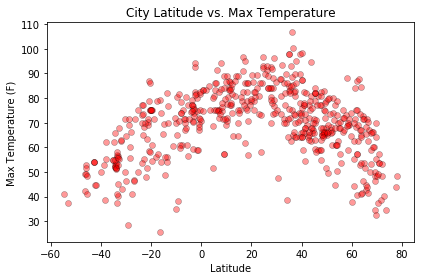

In [67]:
#Plot and save Lat vs. Max Temp
plt.scatter(cities_df["Lat"],cities_df["Max_Temp"],color = "red", alpha =.4, edgecolor="black", linewidth=.5)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save Figure
plt.tight_layout()
plt.savefig("LatitudevTemp.png")

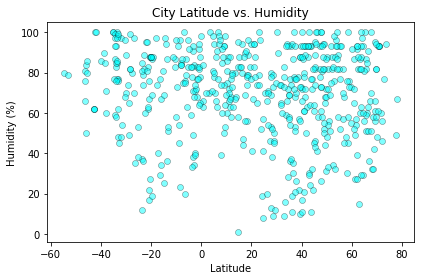

In [70]:
#Plot and save Lat vs. Humidity
plt.scatter(cities_df["Lat"],cities_df["Humidity"],color = "aqua", alpha=.5, edgecolor="black", linewidth=.5)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save Figure
plt.tight_layout()
plt.savefig("LatitudevHumidity.png")

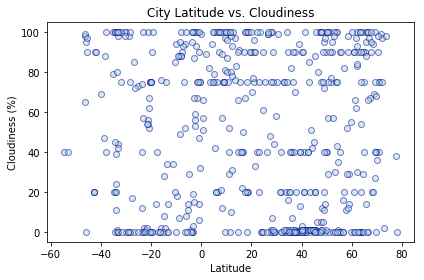

In [71]:
#Plot and save Lat vs. Cloudiness
plt.scatter(cities_df["Lat"],cities_df["Cloudiness"],color = "lightblue", alpha=.5, edgecolor="darkblue", linewidth=1)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save Figure
plt.tight_layout()
plt.savefig("LatitudevClouds.png")

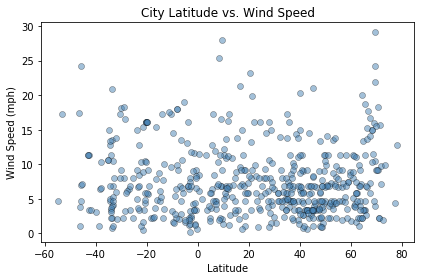

In [72]:
#Plot and save Lat vs. Wind Speed
plt.scatter(cities_df["Lat"],cities_df["Wind_Speed"],color = "steelblue", alpha=.5, edgecolor="black", linewidth=.5)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save Figure
plt.tight_layout()
plt.savefig("LatitudevWind.png")